In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import itertools
import warnings

warnings.filterwarnings('ignore')

In [2]:
results_HiSiaP_open = np.load('data/results_HiSiaP_open.npy', allow_pickle=True)
results_HiSiaP_open_df = pd.DataFrame.from_records(results_HiSiaP_open)

results_HiSiaP_closed = np.load('data/results_HiSiaP_closed.npy', allow_pickle=True)
results_HiSiaP_closed_df = pd.DataFrame.from_records(results_HiSiaP_closed)

results_SBD2_open = np.load('data/results_SBD2_open.npy', allow_pickle=True)
results_SBD2_open_df = pd.DataFrame.from_records(results_SBD2_open)

results_SBD2_closed = np.load('data/results_SBD2_closed.npy', allow_pickle=True)
results_SBD2_closed_df = pd.DataFrame.from_records(results_SBD2_closed)

results_MalE_open = np.load('data/results_MalE_open.npy', allow_pickle=True)
results_MalE_open_df = pd.DataFrame.from_records(results_MalE_open)

results_MalE_closed = np.load('data/results_MalE_closed.npy', allow_pickle=True)
results_MalE_closed_df = pd.DataFrame.from_records(results_MalE_closed)

In [3]:
# HiSiaP open
HiSiaP_open_Eavg_cutoff = np.array(results_HiSiaP_open_df.groupby('res', sort=False).mean()['E_avg'])
HiSiaP_open_Eavg_cutoff = np.tile(HiSiaP_open_Eavg_cutoff, 3)
HiSiaP_open_res = np.tile(results_HiSiaP_open_df['res'], 6)
HiSiaP_open_Eavg = np.array(results_HiSiaP_open_df['E_avg'])
HiSiaP_open_Ex = np.array(results_HiSiaP_open_df['Ex'])
HiSiaP_open_Es = np.array(results_HiSiaP_open_df['Es'])
HiSiaP_open_Ed = np.array(results_HiSiaP_open_df['Ed'])
HiSiaP_open_Ed2 = np.array(results_HiSiaP_open_df['Ed2'])
HiSiaP_open_allE = np.concatenate([HiSiaP_open_Ex, HiSiaP_open_Eavg_cutoff, 
                                   HiSiaP_open_Es, HiSiaP_open_Ed, 
                                   HiSiaP_open_Ed2, HiSiaP_open_Eavg])
HiSiaP_open_cutoff = np.tile(np.array(results_HiSiaP_open_df['cutoff']), 6)
HiSiaP_open_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(HiSiaP_open_Es))
HiSiaP_open_protein = np.repeat('HiSiaP', len(HiSiaP_open_allE))
HiSiaP_open_conformation = np.repeat('open', len(HiSiaP_open_allE))
HiSiaP_open_df = pd.DataFrame({'E': HiSiaP_open_allE, 'Method': HiSiaP_open_name, 
                               'cutoff': HiSiaP_open_cutoff, 'res': HiSiaP_open_res, 
                               'protein': HiSiaP_open_protein, 
                               'conformation': HiSiaP_open_conformation })

# HiSiaP closed
HiSiaP_closed_Eavg_cutoff = np.array(results_HiSiaP_closed_df.groupby('res', sort=False).mean()['E_avg'])
HiSiaP_closed_Eavg_cutoff = np.tile(HiSiaP_closed_Eavg_cutoff, 3)
HiSiaP_closed_res = np.tile(results_HiSiaP_closed_df['res'], 6)
HiSiaP_closed_Eavg = np.array(results_HiSiaP_closed_df['E_avg'])
HiSiaP_closed_Ex = np.array(results_HiSiaP_closed_df['Ex'])
HiSiaP_closed_Es = np.array(results_HiSiaP_closed_df['Es'])
HiSiaP_closed_Ed = np.array(results_HiSiaP_closed_df['Ed'])
HiSiaP_closed_Ed2 = np.array(results_HiSiaP_closed_df['Ed2'])
HiSiaP_closed_allE = np.concatenate([HiSiaP_closed_Ex, HiSiaP_closed_Eavg_cutoff, 
                                     HiSiaP_closed_Es, HiSiaP_closed_Ed, 
                                     HiSiaP_closed_Ed2, HiSiaP_closed_Eavg])
HiSiaP_closed_cutoff = np.tile(np.array(results_HiSiaP_closed_df['cutoff']), 6)
HiSiaP_closed_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(HiSiaP_closed_Es))
HiSiaP_closed_protein = np.repeat('HiSiaP', len(HiSiaP_closed_allE))
HiSiaP_closed_conformation = np.repeat('closed', len(HiSiaP_closed_allE))
HiSiaP_closed_df = pd.DataFrame({'E': HiSiaP_closed_allE, 'Method': HiSiaP_closed_name, 
                                 'cutoff': HiSiaP_closed_cutoff, 'res': HiSiaP_closed_res, 
                                 'protein': HiSiaP_closed_protein, 
                                 'conformation': HiSiaP_closed_conformation})

# SBD2 open
SBD2_open_Eavg_cutoff = np.array(results_SBD2_open_df.groupby('res', sort=False).mean()['E_avg'])
SBD2_open_Eavg_cutoff = np.tile(SBD2_open_Eavg_cutoff, 3)
SBD2_open_res = np.tile(results_SBD2_open_df['res'], 6)
SBD2_open_Eavg = np.array(results_SBD2_open_df['E_avg'])
SBD2_open_Ex = np.array(results_SBD2_open_df['Ex'])
SBD2_open_Es = np.array(results_SBD2_open_df['Es'])
SBD2_open_Ed = np.array(results_SBD2_open_df['Ed'])
SBD2_open_Ed2 = np.array(results_SBD2_open_df['Ed2'])
SBD2_open_allE = np.concatenate([SBD2_open_Ex, SBD2_open_Eavg_cutoff, 
                                 SBD2_open_Es, SBD2_open_Ed, 
                                 SBD2_open_Ed2, SBD2_open_Eavg])
SBD2_open_cutoff = np.tile(np.array(results_SBD2_open_df['cutoff']), 6)
SBD2_open_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(SBD2_open_Es))
SBD2_open_protein = np.repeat('SBD2', len(SBD2_open_allE))
SBD2_open_conformation = np.repeat('open', len(SBD2_open_allE))
SBD2_open_df = pd.DataFrame({'E': SBD2_open_allE, 'Method': SBD2_open_name, 
                             'cutoff': SBD2_open_cutoff, 'res': SBD2_open_res, 
                             'protein': SBD2_open_protein, 
                             'conformation': SBD2_open_conformation})

# SBD2 closed
SBD2_closed_Eavg_cutoff = np.array(results_SBD2_closed_df.groupby('res', sort=False).mean()['E_avg'])
SBD2_closed_Eavg_cutoff = np.tile(SBD2_closed_Eavg_cutoff, 3)
SBD2_closed_res = np.tile(results_SBD2_closed_df['res'], 6)
SBD2_closed_Eavg = np.array(results_SBD2_closed_df['E_avg'])
SBD2_closed_Ex = np.array(results_SBD2_closed_df['Ex'])
SBD2_closed_Es = np.array(results_SBD2_closed_df['Es'])
SBD2_closed_Ed = np.array(results_SBD2_closed_df['Ed'])
SBD2_closed_Ed2 = np.array(results_SBD2_closed_df['Ed2'])
SBD2_closed_allE = np.concatenate([SBD2_closed_Ex, SBD2_closed_Eavg_cutoff, 
                                   SBD2_closed_Es, SBD2_closed_Ed, 
                                   SBD2_closed_Ed2, SBD2_closed_Eavg])
SBD2_closed_cutoff = np.tile(np.array(results_SBD2_closed_df['cutoff']), 6)
SBD2_closed_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(SBD2_closed_Es))
SBD2_closed_protein = np.repeat('SBD2', len(SBD2_closed_allE))
SBD2_closed_conformation = np.repeat('closed', len(SBD2_closed_allE))
SBD2_closed_df = pd.DataFrame({'E': SBD2_closed_allE, 'Method': SBD2_closed_name, 
                               'cutoff': SBD2_closed_cutoff, 'res': SBD2_closed_res, 
                               'protein': SBD2_closed_protein, 
                               'conformation': SBD2_closed_conformation})

# MalE open
MalE_open_Eavg_cutoff = np.array(results_MalE_open_df.groupby('res', sort=False).mean()['E_avg'])
MalE_open_Eavg_cutoff = np.tile(MalE_open_Eavg_cutoff, 3)
MalE_open_res = np.tile(results_MalE_open_df['res'], 6)
MalE_open_Eavg = np.array(results_MalE_open_df['E_avg'])
MalE_open_Ex = np.array(results_MalE_open_df['Ex'])
MalE_open_Es = np.array(results_MalE_open_df['Es'])
MalE_open_Ed = np.array(results_MalE_open_df['Ed'])
MalE_open_Ed2 = np.array(results_MalE_open_df['Ed2'])
MalE_open_allE = np.concatenate([MalE_open_Ex, MalE_open_Eavg_cutoff, 
                                 MalE_open_Es, MalE_open_Ed, 
                                 MalE_open_Ed2, MalE_open_Eavg])
MalE_open_cutoff = np.tile(np.array(results_MalE_open_df['cutoff']), 6)
MalE_open_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_open_Es))
MalE_open_protein = np.repeat('MalE', len(MalE_open_allE))
MalE_open_conformation = np.repeat('open', len(MalE_open_allE))
MalE_open_df = pd.DataFrame({'E': MalE_open_allE, 'Method': MalE_open_name, 
                             'cutoff': MalE_open_cutoff, 'res': MalE_open_res, 
                             'protein': MalE_open_protein, 
                             'conformation': MalE_open_conformation})

# MalE closed
MalE_closed_Eavg_cutoff = np.array(results_MalE_closed_df.groupby('res', sort=False).mean()['E_avg'])
MalE_closed_Eavg_cutoff = np.tile(MalE_closed_Eavg_cutoff, 3)
MalE_closed_res = np.tile(results_MalE_closed_df['res'], 6)
MalE_closed_Eavg = np.array(results_MalE_closed_df['E_avg'])
MalE_closed_Ex = np.array(results_MalE_closed_df['Ex'])
MalE_closed_Es = np.array(results_MalE_closed_df['Es'])
MalE_closed_Ed = np.array(results_MalE_closed_df['Ed'])
MalE_closed_Ed2 = np.array(results_MalE_closed_df['Ed2'])
MalE_closed_allE = np.concatenate([MalE_closed_Ex, MalE_closed_Eavg_cutoff, 
                                   MalE_closed_Es, MalE_closed_Ed, 
                                   MalE_closed_Ed2, MalE_closed_Eavg])
MalE_closed_cutoff = np.tile(np.array(results_MalE_closed_df['cutoff']), 6)
MalE_closed_name = np.repeat(['Ex', 'Eavg_cutoff', 'Static', 'Dynamic', 'Dynamic+', 'Average'], len(MalE_closed_Es))
MalE_closed_protein = np.repeat('MalE', len(MalE_closed_allE))
MalE_closed_conformation = np.repeat('closed', len(MalE_closed_allE))
MalE_closed_df = pd.DataFrame({'E': MalE_closed_allE, 'Method': MalE_closed_name, 
                              'cutoff': MalE_closed_cutoff, 'res': MalE_closed_res, 
                              'protein': MalE_closed_protein, 
                              'conformation': MalE_closed_conformation})

In [4]:
all_systems_df = pd.concat([HiSiaP_open_df, HiSiaP_closed_df, SBD2_open_df, SBD2_closed_df, 
                            MalE_open_df, MalE_closed_df],  ignore_index=True)

In [5]:
res_HiSiaP_open = np.array(results_HiSiaP_open_df.loc[results_HiSiaP_open_df['cutoff'] == 10]['res'])   
res_HiSiaP_closed = np.array(results_HiSiaP_closed_df.loc[results_HiSiaP_closed_df['cutoff'] == 10]['res'])

res_SBD2_open = np.array(results_SBD2_open_df.loc[results_SBD2_open_df['cutoff'] == 10]['res'])   
res_SBD2_closed = np.array(results_SBD2_closed_df.loc[results_SBD2_closed_df['cutoff'] == 10]['res']) 

res_MalE_open = np.array(results_MalE_open_df.loc[results_MalE_open_df['cutoff'] == 10]['res'])   
res_MalE_closed = np.array(results_MalE_closed_df.loc[results_MalE_closed_df['cutoff'] == 10]['res']) 

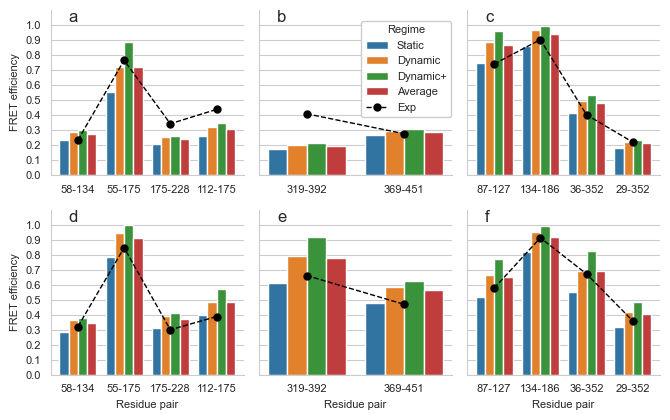

In [36]:
sns.set_style('whitegrid')

g = sns.catplot(data=all_systems_df.loc[(all_systems_df['Method'] != 'Ex') & (all_systems_df['cutoff'] == 10) & 
                                        (all_systems_df['Method'] != 'Eavg_cutoff')], 
                x='res', y='E', hue='Method', col='protein', row='conformation', 
                sharey=True, sharex=False, 
                kind="bar", legend=True)

# change figure size
g.fig.set_size_inches(6.8, 4.3)

ax = g.axes

ax[0, 0].errorbar(res_HiSiaP_open, HiSiaP_open_Ex[0:len(res_HiSiaP_open)], linewidth=1, 
                  marker='.', markersize=10, label='Exp', linestyle='dashed', color='k');

ax[0, 0].text(-0.2, 1.02, "a",fontsize=12)

ax[1, 0].errorbar(res_HiSiaP_closed, HiSiaP_closed_Ex[0:len(res_HiSiaP_closed)], linewidth=1, 
                  marker='.', markersize=10, label='Exp', linestyle='dashed', color='k');

ax[1, 0].text(-0.2, 1.02, "d",fontsize=12)


ax[0, 1].errorbar(res_SBD2_open, SBD2_open_Ex[0:len(res_SBD2_open)], linewidth=1, 
                  marker='.', markersize=10, label='Exp', linestyle='dashed', color='k');

ax[0, 1].text(-0.3, 1.02, "b",fontsize=12)


ax[1, 1].errorbar(res_SBD2_closed, SBD2_closed_Ex[0:len(res_SBD2_closed)], linewidth=1, 
                  marker='.', markersize=10, label='Exp', linestyle='dashed', color='k');

ax[1, 1].text(-0.3, 1.02, "e",fontsize=12)


ax[0, 2].errorbar(res_MalE_open, MalE_open_Ex[0:len(res_MalE_open)], linewidth=1, 
                  marker='.', markersize=10, label='Exp', linestyle='dashed', color='k');

ax[0, 2].text(-0.2, 1.02, "c",fontsize=12)


ax[1, 2].errorbar(res_MalE_closed, MalE_closed_Ex[0:len(res_MalE_closed)], linewidth=1, 
                  marker='.', markersize=10, label='Exp', linestyle='dashed', color='k');

ax[1, 2].text(-0.2, 1.02, "f",fontsize=12)


# Labels
for rows in [0, 1]:
    for cols in [0, 1, 2]:
        
        ax[rows, cols].set_title(None)
        
        ax[rows, cols].set_ylim(0, 1.1)
        ax[rows, cols].set_yticks(np.arange(0,1.1, 0.1))
        for tick in ax[rows, cols].get_xticklabels():
            tick.set_rotation(0)
            tick.set_fontsize(8)
        for label in (ax[rows, cols].get_xticklabels() + ax[rows, cols].get_yticklabels()):
            label.set_fontsize(8)

# Axis labels
#ax[0, 0].set_title('HiSiaP')
#ax[1, 0].set_title('')

#ax[0, 1].set_title('Open conformation\nSBD2', fontsize=8)
#ax[1, 1].set_title('Closed conformation', fontsize=8)

#ax[0, 2].set_title('MalE', fontsize=8)
#ax[1, 2].set_title('')

ax[1, 0].set_xlabel('Residue pair', fontsize=8)
ax[1, 1].set_xlabel('Residue pair', fontsize=8)
ax[1, 2].set_xlabel('Residue pair', fontsize=8)

ax[0, 0].set_ylabel('FRET efficiency', fontsize=8)    
ax[1, 0].set_ylabel('FRET efficiency', fontsize=8)    

legend = ax[1, 2].legend(title='Regime', title_fontsize=8, fontsize=8)

h,l = ax[1, 2].get_legend_handles_labels()
legend = ax[0,1].legend(loc=(.53,.35), handles=h, labels=l, title='Regime', title_fontsize=8, fontsize=8)
ax[1, 2].get_legend().remove()

legend.get_frame().set_alpha(None)

g._legend.remove()

plt.tight_layout()

plt.show()

g.figure.savefig('figs/Fig6.pdf')